In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.constants as c
import astropy.units  as u

## you can undo the lines below (but it will be fun for making fancy plots!)
# to make the lines below work, you have to download the file 'PostProcessingScripts' from https://github.com/FloorBroekgaarden/common_code
# and put this in the same directory as this one, and then only use the bottom line from this code below 
import sys
# sys.path.append('../../common_code') 
# from PostProcessingScripts import * 

# to make the screen wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:


import numpy as np

def kroupa_imf_pdf(m):
    """
    Returns the normalized Kroupa (2001) IMF probability density at stellar mass m [Msun].
    
    m : float or array
        Stellar mass in solar masses.
    
    Returns:
        Probability density (Msun^-1)
    """
    m = np.atleast_1d(m)
    
    # Slopes
    alpha0 = 0.3  # 0.01–0.08 Msun
    alpha1 = 1.3  # 0.08–0.5 Msun
    alpha2 = 2.3  # >= 0.5 Msun
    
    # IMF segments (unnormalized)
    imf = np.zeros_like(m, dtype=float)
    
    mask0 = (m >= 0.01) & (m < 0.08)
    mask1 = (m >= 0.08) & (m < 0.5)
    mask2 = m >= 0.5
    
    imf[mask0] = m[mask0]**(-alpha0)
    imf[mask1] = (0.08**(-alpha0 + alpha1)) * m[mask1]**(-alpha1)  # continuity at 0.08
    imf[mask2] = (0.08**(-alpha0 + alpha1)) * (0.5**(-alpha1 + alpha2)) * m[mask2]**(-alpha2)  # continuity at 0.5
    
    # Normalization over full mass range
    norm_mass = np.logspace(np.log10(0.01), np.log10(100), 10000)
    norm_imf = np.zeros_like(norm_mass)
    
    mask0n = (norm_mass >= 0.01) & (norm_mass < 0.08)
    mask1n = (norm_mass >= 0.08) & (norm_mass < 0.5)
    mask2n = norm_mass >= 0.5
    
    norm_imf[mask0n] = norm_mass[mask0n]**(-alpha0)
    norm_imf[mask1n] = (0.08**(-alpha0 + alpha1)) * norm_mass[mask1n]**(-alpha1)
    norm_imf[mask2n] = (0.08**(-alpha0 + alpha1)) * (0.5**(-alpha1 + alpha2)) * norm_mass[mask2n]**(-alpha2)
    
    normalization = np.trapz(norm_imf, norm_mass)
    
    return (imf / normalization) if m.shape != () else (imf[0] / normalization)

# Example usage
print("PDF at 0.05 Msun:", kroupa_imf_pdf(0.05))
print("PDF at 0.3 Msun:", kroupa_imf_pdf(0.3))
print("PDF at 10 Msun:", kroupa_imf_pdf(10))


PDF at 0.05 Msun: [4.88134894]
PDF at 0.3 Msun: [0.76043695]
PDF at 10 Msun: [0.00039837]


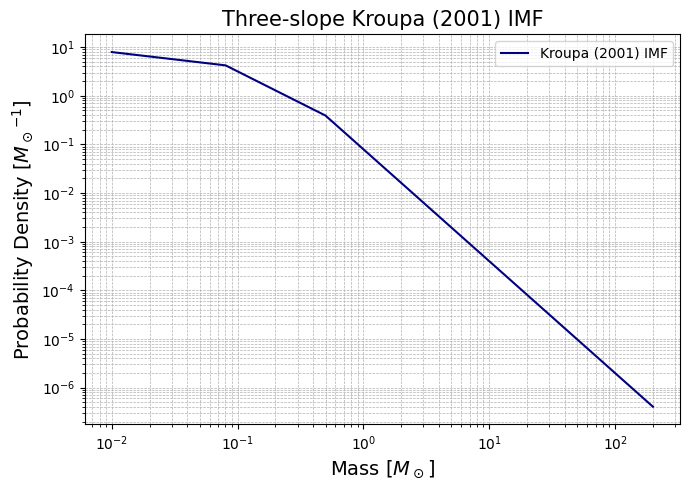

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def kroupa_imf_pdf(m,):
    """Normalized 3-slope Kroupa (2001) IMF PDF."""
    m = np.atleast_1d(m)
    
    alpha0 = 0.3  # 0.01–0.08 Msun
    alpha1 = 1.3  # 0.08–0.5 Msun
    alpha2 = 2.3  # >= 0.5 Msun
    
    imf = np.zeros_like(m, dtype=float)
    
    mask0 = (m >= 0.01) & (m < 0.08)
    mask1 = (m >= 0.08) & (m < 0.5)
    mask2 = m >= 0.5
    
    imf[mask0] = m[mask0]**(-alpha0)
    imf[mask1] = (0.08**(-alpha0 + alpha1)) * m[mask1]**(-alpha1)
    imf[mask2] = (0.08**(-alpha0 + alpha1)) * (0.5**(-alpha1 + alpha2)) * m[mask2]**(-alpha2)
    
    # Normalize over 0.01–200 Msun
    norm_mass = np.logspace(np.log10(0.01), np.log10(200), 10000)
    norm_imf = np.zeros_like(norm_mass)
    mask0n = (norm_mass >= 0.01) & (norm_mass < 0.08)
    mask1n = (norm_mass >= 0.08) & (norm_mass < 0.5)
    mask2n = norm_mass >= 0.5
    norm_imf[mask0n] = norm_mass[mask0n]**(-alpha0)
    norm_imf[mask1n] = (0.08**(-alpha0 + alpha1)) * norm_mass[mask1n]**(-alpha1)
    norm_imf[mask2n] = (0.08**(-alpha0 + alpha1)) * (0.5**(-alpha1 + alpha2)) * norm_mass[mask2n]**(-alpha2)
    normalization = np.trapz(norm_imf, norm_mass)
    
    return imf / normalization

# Mass range for plotting
masses = np.logspace(np.log10(0.01), np.log10(200), 500)
pdf = kroupa_imf_pdf(masses)

# Plot
plt.figure(figsize=(7,5))
plt.loglog(masses, pdf, label="Kroupa (2001) IMF", color='navy')
plt.xlabel(r"Mass [$M_\odot$]", fontsize=14)
plt.ylabel(r"Probability Density [${M_\odot}^{-1}$]", fontsize=14)
plt.title("Three-slope Kroupa (2001) IMF", fontsize=15)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()


 - in Equation 9; what is typical values for m_max (M_encl) ? Why does it not seem to change with Metallicity [Fe/H] or SFR in Figure 1? Can we figure out what this is, and whether m_max is always considered to be 150 Msun 
 
 
 - similar: can we make a plot of Equation 7? Would be very useful 
  
  
 - in the function above (IMF) try to add the first 3 lines from equation 9 (without m_max) but just assuming "1 Msun <= m"  for the last line

Numerical integral check (should be ~1): 1.0000138329528008


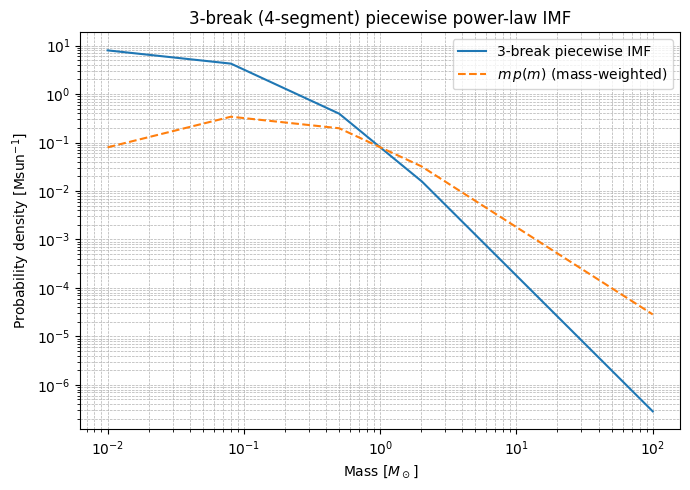

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def _power_integral(m_low, m_high, alpha):
    """Analytic integral of m^{-alpha} from m_low to m_high."""
    if alpha == 1.0:
        return np.log(m_high / m_low)
    else:
        return (m_high**(1.0 - alpha) - m_low**(1.0 - alpha)) / (1.0 - alpha)

def piecewise_powerlaw_pdf_3break(m,
                                 m_min=0.01,
                                 m_break1=0.08,
                                 m_break2=0.5,
                                 m_break3=1.0,
                                 m_max=100.0,
                                 alpha0=0.3,
                                 alpha1=1.3,
                                 alpha2=2.3,
                                 alpha3=2.35):
    """
    Normalized piecewise power-law PDF with 3 breaks (4 segments).
    
    Parameters
    ----------
    m : float or array-like
        Mass(es) in Msun where PDF is evaluated.
    m_min, m_break1, m_break2, m_break3, m_max : floats
        Domain endpoints and break masses (must satisfy m_min < b1 < b2 < b3 < m_max).
    alpha0..alpha3 : floats
        Power-law exponents for each segment: xi(m) ~ m^{-alpha_i}.
        
    Returns
    -------
    pdf : float or ndarray
        Probability density (Msun^-1). Scalar input returns scalar.
    """
    # sanity checks
    if not (m_min < m_break1 < m_break2 < m_break3 < m_max):
        raise ValueError("Require m_min < m_break1 < m_break2 < m_break3 < m_max")
    
    scalar_input = np.isscalar(m)
    m = np.atleast_1d(m).astype(float)
    
    # relative amplitudes from continuity; start with A0 = 1
    A0 = 1.0
    A1 = A0 * (m_break1 ** (alpha1 - alpha0))
    A2 = A1 * (m_break2 ** (alpha2 - alpha1))
    A3 = A2 * (m_break3 ** (alpha3 - alpha2))
    
    # analytic integrals per segment (unnormalized)
    I0 = _power_integral(m_min, m_break1, alpha0)
    I1 = _power_integral(m_break1, m_break2, alpha1)
    I2 = _power_integral(m_break2, m_break3, alpha2)
    I3 = _power_integral(m_break3, m_max, alpha3)
    
    total = A0 * I0 + A1 * I1 + A2 * I2 + A3 * I3
    norm = 1.0 / total
    
    # normalized amplitudes
    A0 *= norm
    A1 *= norm
    A2 *= norm
    A3 *= norm
    
    # evaluate piecewise PDF
    pdf = np.zeros_like(m)
    mask0 = (m >= m_min) & (m < m_break1)
    mask1 = (m >= m_break1) & (m < m_break2)
    mask2 = (m >= m_break2) & (m < m_break3)
    mask3 = (m >= m_break3) & (m <= m_max)
    
    if np.any(mask0):
        pdf[mask0] = A0 * m[mask0] ** (-alpha0)
    if np.any(mask1):
        pdf[mask1] = A1 * m[mask1] ** (-alpha1)
    if np.any(mask2):
        pdf[mask2] = A2 * m[mask2] ** (-alpha2)
    if np.any(mask3):
        pdf[mask3] = A3 * m[mask3] ** (-alpha3)
    
    # scalar return if needed
    return float(pdf[0]) if scalar_input else pdf

# -------------------------
# Example usage + quick plot
# -------------------------
if __name__ == "__main__":
    masses = np.logspace(np.log10(0.01), np.log10(100.0), 1000)
    pdf = piecewise_powerlaw_pdf_3break(
        masses,
        m_min=0.01,
        m_break1=0.08,
        m_break2=0.5,
        m_break3=2.0,   # example: third break at 2 Msun
        m_max=100.0,
        alpha0=0.3,
        alpha1=1.3,
        alpha2=2.3,
        alpha3=2.8      # steeper high-mass slope past 2 Msun
    )
    
    # numerical check of normalization
    integral_check = np.trapz(pdf, masses)
    print("Numerical integral check (should be ~1):", integral_check)
    
    plt.figure(figsize=(7,5))
    plt.loglog(masses, pdf, label="3-break piecewise IMF")
    # also plot m*pdf to show where mass is concentrated (optional)
    plt.loglog(masses, masses * pdf, ls='--', label=r"$m\,p(m)$ (mass-weighted)")
    plt.xlabel("Mass [$M_\\odot$]")
    plt.ylabel("Probability density [Msun$^{-1}$]")
    plt.title("3-break (4-segment) piecewise power-law IMF")
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()
